<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/04_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.5 Evaporation
Based on the energy balance, the evaporation rate ($E_r$) after neglecting the sensible heat flux and ground heat flux, can be calculated as,

$E_r = \frac{R_n}{l_v \rho_w} $

where, $R_n$ is the net radiation, $l_v$ is the latent heat of vaporization, and $\rho_w$ is the water density. The
$l_v$ can be approximated as,

$l_v = 2500 − 2.36 T$ 

where, $T$ is the temperature in Celcius.

Based on the aerodynamic, the evaporation rate ($E_a$) can be calculated as,

$E_a = B(e_{as} −e_a)$,

where,

$B = \frac{0.622 k^2 \rho_a u_2}{p \rho_w [\ln(z_2/z_0)]^2} $,

$e_{as}$ is the saturated vapor pressure, $e_a$ is the vapor pressure, $k$ is the von Karnman coefficient, $u_2$ is
wind velocity measured at $z_2$ m height, $p$ is the air pressure, and $z_0$ is the roughness height.

Usually, evaporation is calculated by combining the energy balance and aerodynamic method. In
this case the $E$ becomes,

$ E = \frac{\Delta}{\Delta + \gamma} E_r + \frac{\gamma}{\Delta + \gamma} E_a$,

where, $\Delta$ is the gradient of the saturated vapor pressure curve, and is,

$ \Delta = \frac{4098 e_s}{(273.3+T)^2}$ and, 

the $\gamma$ is the psychrometric constant, and is defined as,

$ \gamma = \frac{C_p K_h p}{0.622 l_v K_w} $,

$K_h$ and $K_w$ are the heat and vapor diffusivities respectively. 

Let us first generate the synthetic data using random numbers. We know that *np.random.rand* provides uniformly distributed random number over an interval of [0,1]. If we want to get the
uniformly distributed random number over some other range, say [a,b], we can transform the variable in the following way:

$ x_{new} = a+ (b−a) ∗ x_{old}$,

where, $x_{old}$ is uniformly distributed random variable over [0,1], and $x_{new}$ has the range of [a,b].

The *np.random.randn* gives normally distributed random variables having zero mean and standard
deviation equal to one. If we are interested in normally distributed random variable having mean $\mu$
and standard deviation equal to $\sigma$. We can do the following transformation.

$y_{new} = \mu + \sigma ∗ y_{old}$,

where, $y_{new}$ is transformed variable having mean equal to $\mu$ and standard deviation equal to $\sigma$, and
$y_{old}$ is the normally distributed random variable with mean zero and standard deviation equation to
one, as generated by the *np.random.randn* function. 

In the following example, we shall generate variable in their usual range. The comment after the variable provides details of the lower and upper range in case of uniformly distributed random variable, mean and standard deviation when the variable is normally distributed.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# generate the synthetic data
Rn = 150+100*np.random.rand(100) # lower bound = 150, upper boun = 250
T = 25+3*np.random.randn(100) # mean = 25, std = 3
Rh = 0.2+0.6*np.random.rand(100) # lower bound = 0.2, upper boun = 0.8
u2 = 3+np.random.randn(100) # mean = 3, std = 1

# define constants
rho_w = 997; rho_a = 1.19; p = 101.1e3; z2 = 2
z0 = 0.03e-2; k = 0.4; Cp = 1005

Now, we apply the energy balance based method to estimate the evaporation.

In [12]:
lv = (2500-2.36*T)*1000 # multiplied by thousand to convert from KJ/kg to J/kg
Er = 200/(lv*997)
Er *= 1000*86400 # convert from m/s to mm/day

We are using multiplication and assignment operator to convert the units. We could have done this by simply multiplication also i.e. *Er = Er*1000*86400*. The multiplication and assignment operator is fast, as it does not create any temporary variable in the memory. In fact all the assignment operator are faster than simple operator, and should be used whenever there is scope to use them. Now we
estimate the evaporation using the aerodynamic method.

In [13]:
B = 0.622*k**2*rho_a*u2/(p*rho_w*(np.log(z2/z0))**2)
e_s = 611*np.exp(17.27*T/(237.3+T))
e_a = Rh*e_s
Ea = B*(e_s-e_a)
Ea *= 1000*86400 # convert from m/s to mm/day

Now, we combine energy balance and aerodynamic method to get improved estimate of the evaporation.

In [14]:
gamma = Cp*p/(0.622*lv) # since kh/kw = 1, hence they are dropped form eq.
delta = 4098*e_s/(237.3+T)**2
w = delta/(delta+gamma)
E = w*Er + (1-w)*Ea

Now, we have got four important variables; evaporation using energy balance method ($E_r$), evaporation using aerodynamics method ($E_a$), combined evaporation ($E$), and the ratio of evaporation from energy balance method by combined method ($E_r/E$). We can plot these four variables in four different plot, or we can put them in one figure by making figure into four section. subplot is such a function to make figure into subsection. The first argument to subplot is the desired number of rows, second argument is the desired numbers of columns in the figure. The third argument is the position of subplot in the figure, which is measured from left to right and top to bottom.

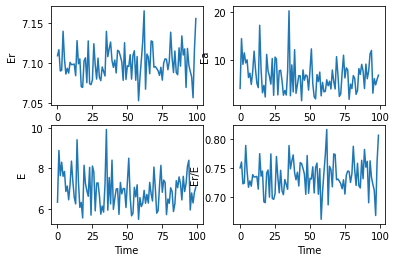

In [17]:
plt.subplot(2,2,1)
plt.plot(Er)
plt.xlabel('Time')
plt.ylabel('Er')

plt.subplot(2,2,2)
plt.plot(Ea)
plt.xlabel('Time')
plt.ylabel('Ea')

plt.subplot(2,2,3)
plt.plot(E)
plt.xlabel('Time')
plt.ylabel('E')

plt.subplot(2,2,4)
plt.plot(w)
plt.xlabel('Time')
plt.ylabel('Er/E')
plt.show()

In the above figure, the ylabel of subplot 4 is overlapping with the subplot 3. This can be corrected by
changing the wspace. Which is demonstrated in below  figure.

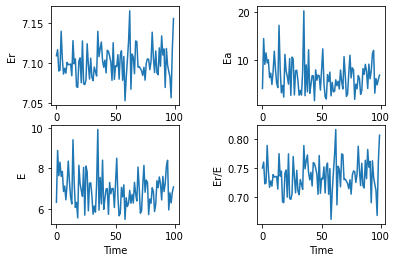

In [18]:
fig = plt.figure()
fig.subplots_adjust(wspace=0.6)

plt.subplot(2,2,1)
plt.plot(Er)
plt.xlabel('Time')
plt.ylabel('Er')

plt.subplot(2,2,2)
plt.plot(Ea)
plt.xlabel('Time')
plt.ylabel('Ea')

plt.subplot(2,2,3)
plt.plot(E)
plt.xlabel('Time')
plt.ylabel('E')

plt.subplot(2,2,4)
plt.plot(w)
plt.xlabel('Time')
plt.ylabel('Er/E')
plt.show()